In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


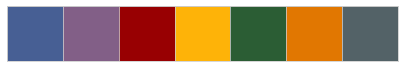

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# read in dataset and data keys
df = pd.read_json('capstone1_ds.json')

I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.

In [6]:
# extract top profitable actors
top_df = df[df['actor_value'] >= df['actor_value'].quantile(0.9)]

In [7]:
# extract elite profitable actors
elite_df = df[df['actor_value'] >= df['actor_value'].quantile(0.99)]

In [8]:
# recall features
df.columns

Index(['actor_value', 'gender', 'age', 'runtime', 'rating', 'action',
       'adventure', 'animation', 'comedy', 'crime', 'drama', 'family',
       'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

In [9]:
# create list of non-genre feature names
non_genre_lst = ['actor_value', 'gender', 'age', 'runtime', 'rating']

In [10]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

In [11]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe()

,actor_value,gender,age,runtime,rating
count,14996.000000,14996.000000,14996.000000,14996.000000,14996.000000
mean,-0.229659,0.383769,37.928753,108.271574,6.482715
std,41.545957,0.486319,14.405080,17.945735,0.278802
min,-2109.777393,0.000000,1.182776,70.000000,4.766128
25%,-0.000242,0.000000,27.763257,97.000000,6.354691
50%,0.001247,0.000000,36.260156,106.000000,6.422527
75%,0.047182,1.000000,47.147443,116.000000,6.571283
max,2612.251452,1.000000,98.961649,254.000000,8.338412


In [12]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe()

,actor_value,gender,age,runtime,rating
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,8.671765,0.412000,35.255267,106.798473,6.528072
std,92.996904,0.492359,13.083364,19.890147,0.289737
min,0.416025,0.000000,7.592216,70.000000,5.291592
25%,0.657747,0.000000,25.960834,93.650000,6.395565
50%,1.079400,0.000000,33.109429,104.115132,6.460128
75%,2.491645,1.000000,43.137368,116.000000,6.643021
max,2612.251452,1.000000,91.347529,233.000000,7.981787


In [13]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe()

,actor_value,gender,age,runtime,rating
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,73.348596,0.400000,32.843611,99.104000,6.514669
std,286.901508,0.491539,11.673995,23.986223,0.291434
min,6.953442,0.000000,7.994688,70.000000,5.821575
25%,9.098588,0.000000,25.345832,86.100000,6.388986
50%,13.194957,0.000000,31.018775,93.000000,6.442448
75%,26.195634,1.000000,36.843330,104.000000,6.660546
max,2612.251452,1.000000,72.205909,218.000000,7.460161


In [14]:
# observe genre statistics for all actors
df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,14996.0,0.915177,1.901336,0.0,0.0,0.0,1.0,41.0
adventure,14996.0,0.639704,1.411436,0.0,0.0,0.0,1.0,25.0
animation,14996.0,0.175247,0.659880,0.0,0.0,0.0,0.0,11.0
comedy,14996.0,1.218992,2.410642,0.0,0.0,1.0,1.0,35.0
crime,14996.0,0.546012,1.297887,0.0,0.0,0.0,1.0,27.0
drama,14996.0,1.542478,2.662497,0.0,0.0,1.0,2.0,35.0
family,14996.0,0.365964,0.965479,0.0,0.0,0.0,0.0,15.0
fantasy,14996.0,0.347293,0.882088,0.0,0.0,0.0,0.0,17.0
history,14996.0,0.148506,0.499034,0.0,0.0,0.0,0.0,9.0
horror,14996.0,0.371032,0.749595,0.0,0.0,0.0,1.0,13.0


In [15]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,1500.0,1.282667,2.694118,0.0,0.0,0.0,1.0,27.0
adventure,1500.0,1.055333,2.033477,0.0,0.0,0.0,1.0,16.0
animation,1500.0,0.342667,0.929779,0.0,0.0,0.0,0.0,7.0
comedy,1500.0,2.061333,4.070457,0.0,0.0,1.0,2.0,35.0
crime,1500.0,0.725333,1.759533,0.0,0.0,0.0,1.0,20.0
drama,1500.0,2.378000,4.039389,0.0,0.0,1.0,3.0,35.0
family,1500.0,0.633333,1.373128,0.0,0.0,0.0,1.0,15.0
fantasy,1500.0,0.561333,1.313286,0.0,0.0,0.0,1.0,17.0
history,1500.0,0.229333,0.675063,0.0,0.0,0.0,0.0,7.0
horror,1500.0,0.579333,1.006172,0.0,0.0,0.0,1.0,13.0


In [16]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
action,150.0,0.233333,0.584092,0.0,0.0,0.0,0.0,4.0
adventure,150.0,0.206667,0.571078,0.0,0.0,0.0,0.0,4.0
animation,150.0,0.186667,0.468994,0.0,0.0,0.0,0.0,3.0
comedy,150.0,0.580000,1.249268,0.0,0.0,0.0,1.0,10.0
crime,150.0,0.160000,0.464585,0.0,0.0,0.0,0.0,3.0
drama,150.0,0.686667,0.935050,0.0,0.0,0.0,1.0,5.0
family,150.0,0.286667,0.627520,0.0,0.0,0.0,0.0,4.0
fantasy,150.0,0.226667,0.592420,0.0,0.0,0.0,0.0,3.0
history,150.0,0.046667,0.267644,0.0,0.0,0.0,0.0,2.0
horror,150.0,0.580000,0.837622,0.0,0.0,0.0,1.0,5.0


There are some trend in the data.<br>
I will explore a few of them with visualizations.

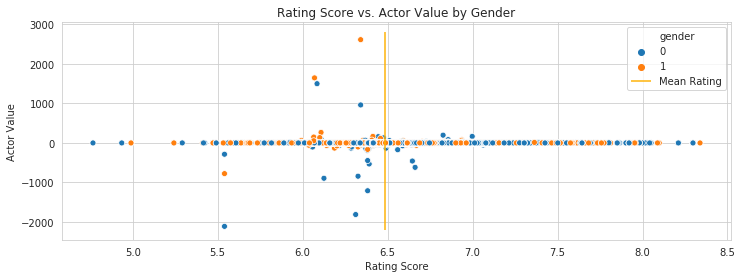

In [17]:
# plot rating score vs. actor value by gender

sns.scatterplot(x='rating', y='actor_value', hue='gender', data=df)

plt.vlines(x=np.mean(df['rating']), ymin=-2200, ymax=2800, 
           colors=mp.colors(3), label='Mean Rating')

plt.xlabel('Rating Score')
plt.ylabel('Actor Value')

plt.legend()
plt.title('Rating Score vs. Actor Value by Gender');

The actors with extreme values tend to have ratings lower than the average actor.<br>
The highest earning actors are not the ones with the best ratings.<br>
The actors with the lowest values are male actors.

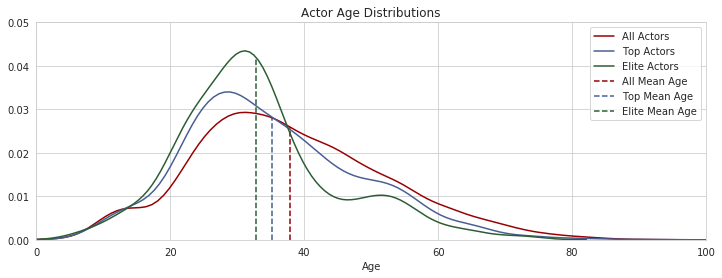

In [18]:
# plot age distributions for all actors vs. top actors

plt.xlim(0, 100)
plt.ylim(0, 0.05)

sns.kdeplot(df['age'],color=mp.colors(2), label='All Actors')
plt.vlines(x=np.mean(df['age']), ymin=0, ymax=0.026, color=mp.colors(2), 
           label='All Mean Age', linestyles='dashed')

sns.kdeplot(top_df['age'], color=mp.colors(0),label='Top Actors')
plt.vlines(x=np.mean(top_df['age']), ymin=0, ymax=0.028, color=mp.colors(0), 
          label='Top Mean Age', linestyles='dashed')

sns.kdeplot(elite_df['age'], color=mp.colors(4),label='Elite Actors')
plt.vlines(x=np.mean(elite_df['age']), ymin=0, ymax=0.042, color=mp.colors(4), 
          label='Elite Mean Age', linestyles='dashed')

plt.xlabel('Age')
plt.legend()
plt.title('Actor Age Distributions');

The average actor age decreases as we go from all actors to the most elite ones.<br>
Also, there is an uptick in earning potential that appears for higher ranked actors in their 50's.

Now, I will rank the actors by their tier.

In [19]:
# create top actor binary feature
df['is_top'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(top_df['actor_value']) ))

In [20]:
# create elite actor binary feature
df['is_elite'] = df['actor_value'].transform(
    lambda x: int(x >= np.min(elite_df['actor_value']) ))

In [21]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [22]:
# change gender labels
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

In [23]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,actor_value,gender,age,runtime,rating,is_top,is_elite,rank
2,6.771807,male,48.061676,114.166667,7.025860,1,0,1
3,1.517763,male,54.177455,120.545455,6.717226,1,0,1
4,0.726447,female,41.949084,114.176471,6.804011,1,0,1


The rank feature is 2 for elite 1%, 1 for top 10%, and 0 for all other actors.

In [24]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [25]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [26]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [27]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,650,27,13724
1,adventure,631,23,9593
2,animation,278,24,2628


Now, I have the actors grouped by their movie genres and tiers.

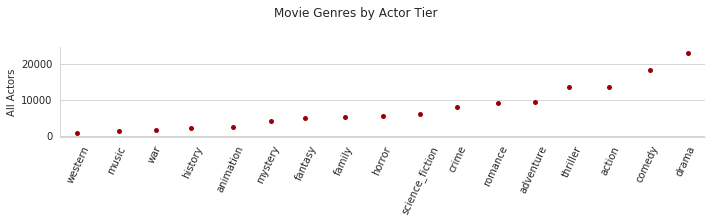

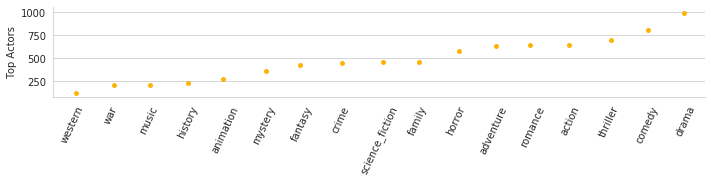

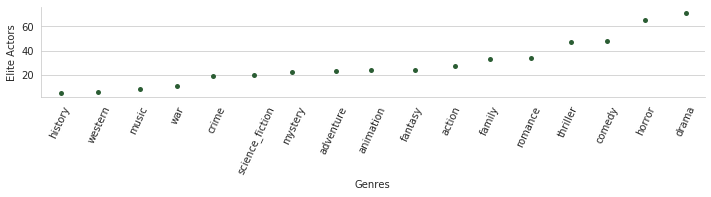

In [28]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The drama genre is consistantly the most favorable to increase an actor's earning potential.<br>
Horror overtakes comedy for the second best genre when we get to highest earning acting roles.<br>
Family movies steadily make their way up the scale when looking at the upper tiers.

Western, music, war, and history movies are consistantly at the bottom of earning options for any tiered actor.

In [29]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [30]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [31]:
# observe DataFrame
gender_rank_df.head(3)

,gender,rank,genre,count
0,male,1,action,9
1,male,1,action,18
2,female,1,action,6


Now, I have the actors grouped by their movie genres, genders, and ranks.

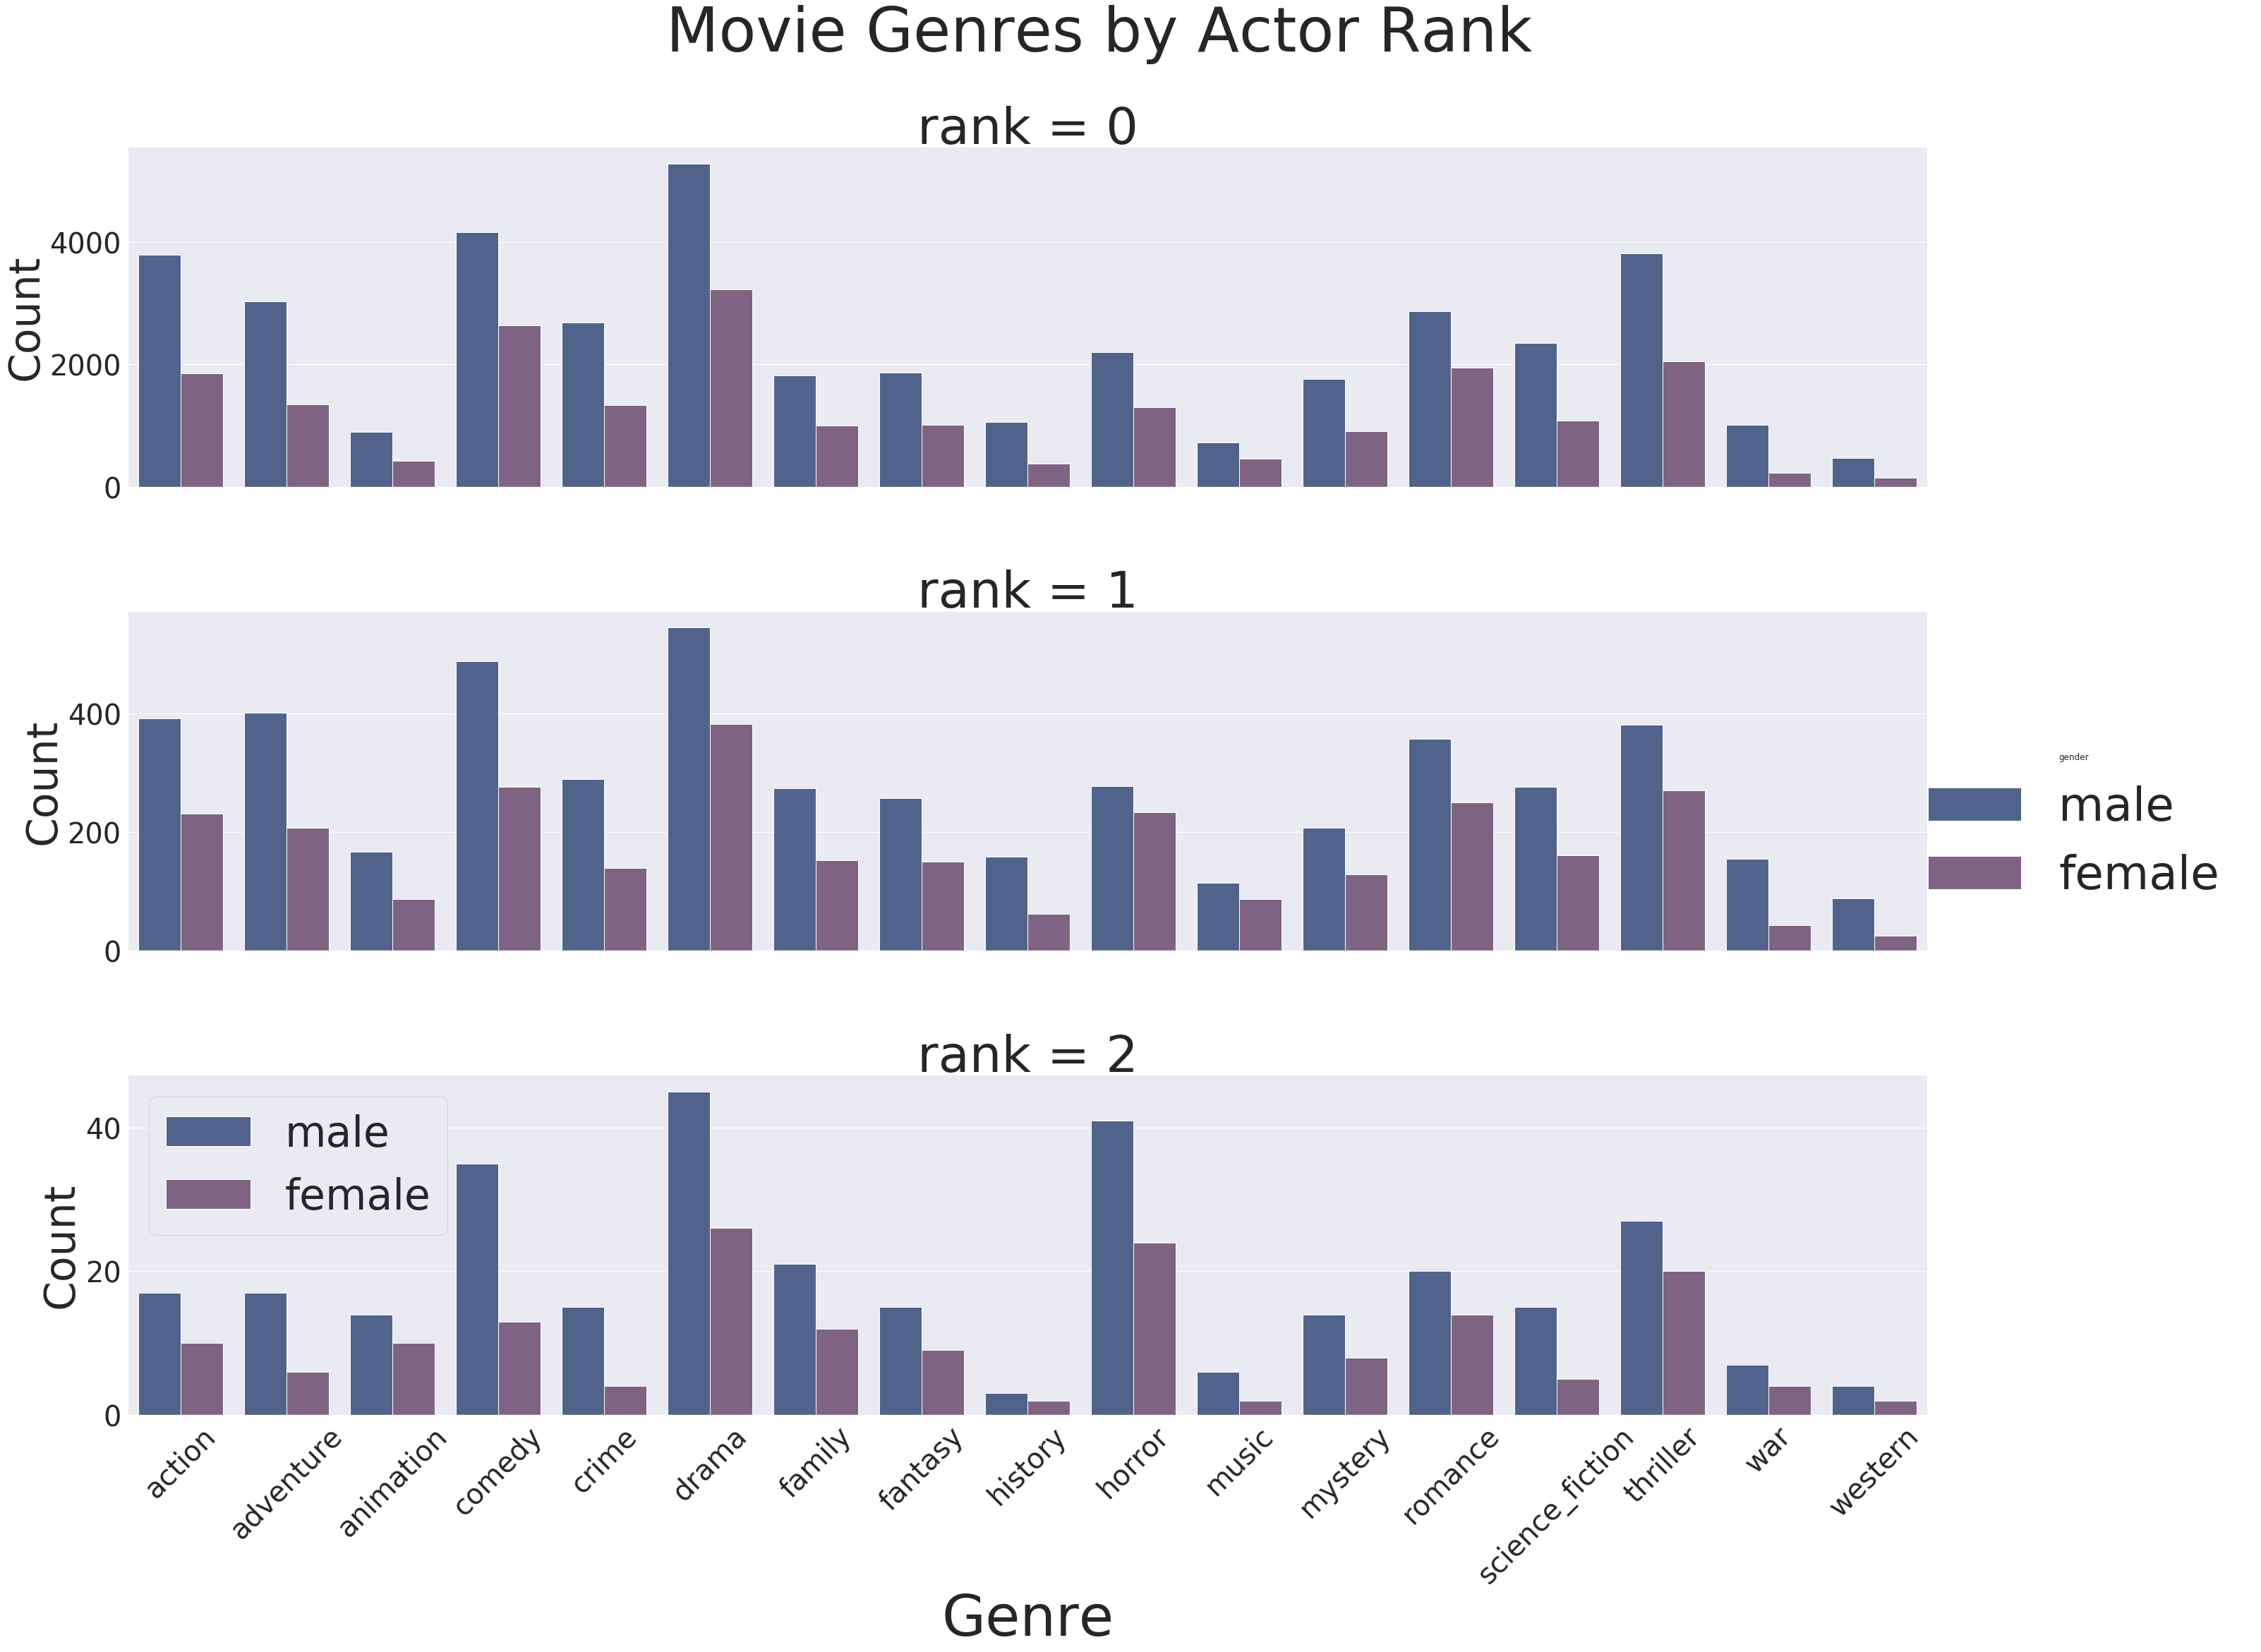

In [32]:
# plot distribution of genres by actor rank 

sns.set(font_scale=6)
g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, kind='count', 
            sharey=False, height=10, aspect=4, palette=sns.xkcd_palette(mp.my_colors))

g.set_xticklabels(fontsize=40, rotation=45)
g.set_yticklabels(fontsize=40)

g.set_xlabels(fontsize=40)
g.set_ylabels('Count', fontsize=60)
plt.legend(fontsize=60)

plt.xlabel('Genre', fontsize=80)

g.fig.suptitle('Movie Genres by Actor Rank', y=1.03);

In [33]:
# observe percentage of observations consisting of male actors
(df['gender'].value_counts() / df.shape[0])[0] * 100

61.62309949319818

Given the excess of male actors in the data, the gender splits look fairly consistant throughout the actor ranks.<br>
As the ranks progress, the female actors get closer the male actors in the action, animation, thriller, and war genres.<br>
Although, they fall behind in the comedy, crime, horror, music, and science fiction genres.